In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom


In [2]:
# Generating the dataset using Binomial Distribution
np.random.seed(42)
n = 100 # Total products
p = 0.1 # Probability of a product being defective
data = np.random.binomial(1, p, n)
outcome_map = {1: 'Defective', 0: 'Non-Defective'}
data = [outcome_map[i] for i in data]
df = pd.DataFrame(data, columns=['Quality Check Outcome'])
# Display the first few rows of the dataframe
df.head()


,Quality Check Outcome
0,Non-Defective
1,Defective
2,Non-Defective
3,Non-Defective
4,Non-Defective


In [3]:
df.describe()

,Quality Check Outcome
count,100
unique,2
top,Non-Defective
freq,91


In [6]:
# Display count of Defective & Non-Defective products
def_count = df[df['Quality Check Outcome'] == 'Defective'].shape[0]
non_def_count = df[df['Quality Check Outcome'] == 'Non-Defective'].shape[0]
print(f"Number of Defective Products: {def_count}")
print(f"Number of Non-Defective Products: {non_def_count}")

# Interpretation based on counts
total_products = len(df)
def_percentage = (def_count / total_products) * 100

print(f"Percentage of Defective Products: {def_percentage:.2f}%")


Number of Defective Products: 9
Number of Non-Defective Products: 91
Percentage of Defective Products: 9.00%


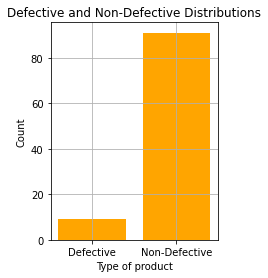

In [10]:
# Visualizing the distribution of Defective and Non-Defective products
plt.figure(figsize=(3,4))
plt.bar(['Defective', 'Non-Defective'], [def_count, non_def_count], color= 'orange')
plt.title('Defective and Non-Defective Distributions')
plt.xlabel('Type of product')
plt.ylabel('Count')
plt.grid(True)
plt.show()


In [11]:
# Estimating p (Probability of Defective Product)
probability_def = df[df['Quality Check Outcome'] == 'Defective'].count()[0] /len(df)
print(f"Estimated probability of a product being defective (p): {probability_def:.4f}")
# Probability of more than 10 defective products out of the next 50 using binomial distribution
extra= 50
more_than_10_def= 1 - binom.cdf(10, extra, probability_def)
print(f"Probability of more than 10 defective products out of the next 50: {more_than_10_def:.4f}")


Estimated probability of a product being defective (p): 0.0900
Probability of more than 10 defective products out of the next 50: 0.0043


Visualisation: Display of a Bar Chart: The code generates a bar chart that depicts the number of defective and non-defective items. This visualisation provides a graphical depiction of the distribution, making the ratio of faulty
to non-defective items easier to understand.
Probability of Defective Product Estimation (p): Based on the proportion of defective items in the given dataset, it computes the estimated probability 'p' of a product being defective.This predicted 'p' value offers information on
the likelihood of encountering defective items in this manufacturing line.
Probability Calculation for Future Defective Products: The code determines the likelihood of having more than 10 defective products out of the following 50 items using the estimated 'p' value.

Q2

In [12]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson


In [13]:
# Generating the dataset using Poisson Distribution
np.random.seed(42)
lambda_value = 5 # Average number of customers arriving per hour
hours = list(range(1, 25))
data = np.random.poisson(lambda_value, 24)
df = pd.DataFrame({'Hour': hours, 'Number of Customers': data})
# Display the first few rows of the dataframe
df.head()


,Hour,Number of Customers
0,1,5
1,2,4
2,3,4
3,4,5
4,5,5


In [14]:
df.describe()


,Hour,Number of Customers
count,24.000000,24.000000
mean,12.500000,4.916667
std,7.071068,2.124734
min,1.000000,1.000000
25%,6.750000,4.000000
50%,12.500000,5.000000
75%,18.250000,6.000000
max,24.000000,11.000000


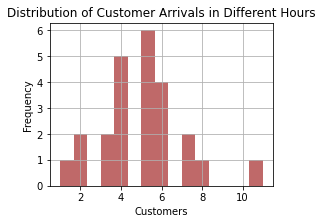

In [15]:

plt.figure(figsize=(4,3))
plt.hist(df['Number of Customers'], bins=15, alpha=0.7, color='brown')
plt.xlabel('Customers')
plt.ylabel('Frequency')
plt.title('Distribution of Customer Arrivals in Different Hours')
plt.grid()
plt.show()


In [17]:
from scipy.stats import poisson

# Estimating the average rate of customer arrivals per hour
est_lambda = df['Number of Customers'].mean()
print(f"Estimated average rate of customer arrivals per hour is (λ): {est_lambda:.4f}")

# Calculating the probability of more than 10 customers arriving in a given hour
ten_plus = 1 - poisson.cdf(10, est_lambda)
print(f"Probability of more than 10 customers arriving in a given hour: {ten_plus:.4f}")


Estimated average rate of customer arrivals per hour is (λ): 4.9167
Probability of more than 10 customers arriving in a given hour: 0.0122


Estimation of Average Arrival Rate (\(\lambda\)): This function calculates the estimated average rate of customer arrivals per hour. Derived from observed data, this value represents the anticipated number of customers arriving within a specific hour.

Probability of Exceeding Ten Customer Arrivals: Utilizing the estimated average rate (\(\lambda\)), the code assesses the probability of more than ten customers arriving in a given hour. This probability offers insights into the likelihood of encountering elevated customer traffic during specific hours.

Conclusions and Implications:

Arrival Patterns: The histogram visualization assists in identifying peak hours or periods characterized by heightened customer activity, enabling effective scheduling of staff and resources.

Average Arrival Rate: The estimated average rate (\(\lambda\)) signifies the expected number of customers per hour on average. This information is valuable for forecasting and strategic planning.

Probability Analysis: Calculating the likelihood of surpassing ten customer arrivals provides valuable insights for service capacity planning and resource allocation, particularly during busy periods.

Conclusion:

The Poisson distribution analysis of customer arrivals per hour yields valuable insights into variability, central tendencies, and the potential for increased customer counts during different hours.

Q3

In [18]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon


In [19]:
# Generating the dataset using Exponential Distribution
np.random.seed(42)
lambda_value = 2 # Average number of requests per minute
data = np.random.exponential(1/lambda_value, 1000)
df = pd.DataFrame(data, columns=['Time Between Requests (minutes)'])
# Display the first few rows of the dataframe
df.head()


,Time Between Requests (minutes)
0,0.234634
1,1.505061
2,0.658373
3,0.456471
4,0.084812


In [20]:
#The distribution of time intervals between consecutive server requests appears to follow an exponential distribution. It suggests that shorter intervals between requests are more common than longer intervals, which aligns with the nature of high-traffic websites where requests arrive more frequently.


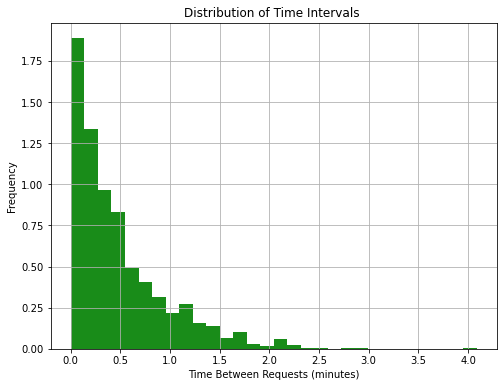

In [21]:
# Plotting a histogram to visualize the distribution of time intervals
plt.figure(figsize=(8, 6))
plt.hist(df['Time Between Requests (minutes)'], bins=30, density=True, alpha=0.9, color= 'green')
plt.title('Distribution of Time Intervals ')
plt.xlabel('Time Between Requests (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [22]:
# Estimate the rate parameter (λ) of the Exponential Distribution
rate_parameter = 1 / df.mean().values[0]
# Calculate the probability that the time between two consecutive requests will exceed 2 minutes
prob_exceed_2_minutes = expon.sf(2, scale=1/rate_parameter)
# Determine the time by which 90% of the requests would have already arrived post a previous request
time_for_90_percent = expon.ppf(0.9, scale=1/rate_parameter)
print("Estimated rate parameter (λ):", rate_parameter)
print("Probability of time between requests exceeding 2 minutes:", prob_exceed_2_minutes)
print("Time by which 90% of requests would have arrived post a previous request:", time_for_90_percent)


Estimated rate parameter (λ): 2.0565426917795255
Probability of time between requests exceeding 2 minutes: 0.016357228265927268
Time by which 90% of requests would have arrived post a previous request: 1.1196388493163834


Estimated Rate Parameter (\(\lambda\)): The rate parameter of the exponential distribution, denoted as \(\lambda\), is estimated as the inverse of the sample mean of the dataset. This parameter signifies the average arrival rate of requests per unit of time, indicating the rate at which server requests are typically received. A higher \(\lambda\) suggests a greater request arrival rate.

Probability of Exceeding 2 Minutes between Requests: The estimated probability reflects the likelihood that the time interval between two consecutive server requests will exceed 2 minutes. This probability is derived from the fitted exponential distribution and provides insights into the occurrence of longer intervals between requests.

Time for 90% of Requests to Arrive after a Previous Request: This metric illustrates the time span within which 90% of subsequent requests are expected to arrive after a previous request. It highlights the time range during which the majority of requests occur, emphasizing the frequent occurrence of requests within a relatively short time period.